# Redes Feed Forward en Keras

# Red para MNIST

Ahora construiremos una red para un problema real de detección de números escritos a mano. No entrenaremos la red si no que cargaremos pesos directamente y la usaremos para hacer predicciónes. 

Vamos a partir cargando datos desde `keras.datasets.mnist`.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Carga datos de MNIST (solo cargaremos un conjunto de pruebas).
# Nota el tamaño de los datos

_, (imgs, labs) = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

11501568/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000,)


etiqueta: 7


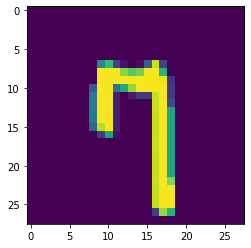

In [ ]:
# Podemos visualizar una imagen cualquiera 
# (si ejecutas esta celda cambiando 'd' puedes ver una distinta)

from matplotlib import pyplot as plt
d = 80
print('etiqueta:',labs[d])
plt.imshow(imgs[d])

Lo primero que debes notar es que los inputs tienen forma de (10000, 28, 28) lo que será  un problema para cualquier red que hagamos. Por lo que cambiaremos su forma y lo dejaremos todo en una matriz de 10000 x (28*28), esto lo hacemos con el comando `reshape`.

In [ ]:
X = imgs.reshape(10000,28*28)
print(X.shape)

(10000, 784)


Lo siguiente que haremos será "normalizar" los valores de entrada, de manera tal que todos estén entre 0 y 1. Más adelante veremos que este paso resulta demasiado importante en el buen funcionamiento de las redes. Las imágenes son valores de intensidad de un pixel de entre 0 y 255. Para normalizarlos simplemente dividimos todos los datos por 255.

In [ ]:
# Dividimos por 255
X = X / 255

##  Descripción de la  red para MNIST


En esta parte, usaremos pesos y bias preconstruidos para crear una red que predice (con alta certeza) la etiqueta de imágenes de números escritos a mano en imágenes de 28x28 pixeles. La red tiene esta arquitectura:

784 --> 32 (relu) --> 16 (relu) --> 10 (softmax)

Tu trabajo será crear la red con esa arquitectura usando `keras.Sequential` y `keras.layers.Dense`, usar las funciones de activación correspondientes, cargar los pesos y bias en cada una  de las capas, y luego probar la red haciendo predicciones para ciertos ejemplos.

** Este ejercicio es considerablemente más largo que los anteriores **

## Paso 0: Construyendo las matrices de pesos

Carga los pesos y bias  de la red. Los archivos son tales que `W1.txt` y `b1.txt`  corresponden al a primera capa, `W2.txt` y `b2.txt` a la segunda,  y `U` y `c` a la capa final.

In [ ]:
# Con el siguiente código puedes descargar los pesos
# y descomprímelos en la carpeta mnist_weights.

!wget -q dcc.uchile.cl/~jperez/cursos/cc66h/mnist_weights.tar.gz -o /dev/null
!tar -zxvf mnist_weights.tar.gz

mnist_weights/
mnist_weights/c.txt
mnist_weights/W1.txt
mnist_weights/b1.txt
mnist_weights/b2.txt
mnist_weights/U.txt
mnist_weights/W2.txt


In [ ]:
import numpy as np

In [ ]:
# Para cargar datos desde archivos en arreglos numpy
# puedes usar np.loadtxt

W1 = np.loadtxt('mnist_weights/W1.txt')
b1 = np.loadtxt('mnist_weights/b1.txt')

In [ ]:
# Carga tu los datos en las variables W2, b2, U, y c

# Acá empieza tu código (~4 lineas)
W2 = np.loadtxt('mnist_weights/W2.txt')
b2 = np.loadtxt('mnist_weights/b2.txt')
U = np.loadtxt('mnist_weights/U.txt')
c = np.loadtxt('mnist_weights/c.txt')
# Acá termina tu código

# Si todo funciona bien, lo siguiente debiera imprimir los valores
# -0.14337286353111267
# 0.06190946325659752
# 0.10503328591585159
# 0.12370651960372925

print(W2[5][7])
print(b2[10])
print(U[6][8])
print(c[5])

-0.14337286353111267
0.06190946325659752
0.10503328591585159
0.12370651960372925


## Paso 1: Creando la  red

Crea la red. Llámale simplemente `red`.


In [ ]:
# Acá empieza tu código (~5 líneas)
#784 --> 32 (relu) --> 16 (relu) --> 10 (softmax)


# Acá termina tu código

## Paso 2: Carga los pesos

Carga los pesos en cada una de las capas  (según lo que aprendiste antes)

In [ ]:
# Acá empieza tu código (~3 líneas)


# Acá termina tu código

In [ ]:
# Si cargaste todo correctamente, lo siguiente debiera dar el valor 0.9669603



0.9669603


## Paso 3: Probabiilidades de predicción

Primero imprime la imágen en el índice 195, y luego,  con tu red cargada calcula las probabilidades para cada clase para la imagen en el índice 195. ¿Cuáles son las dos clases más probables para este ejemplo?

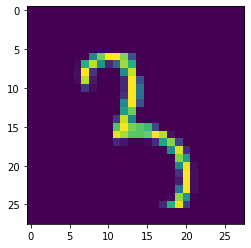

In [ ]:
# Primero imprimimos
plt.imshow(imgs[195])

In [ ]:
# Ahora calcula las probabilidades para cada clase. 
# Acá empieza tu código (~4 líneas)
# Calculemos primero la predicción para los inputs en el rango 0:5


# Acá termina tu código
# Cuáles son las más altas?

[[9.89117543e-05 1.14829715e-10 8.65740294e-04 4.21108073e-03
  6.43082285e-06 7.96730164e-05 4.71228525e-12 9.94548976e-01
  5.46452554e-07 1.88707738e-04]
 [2.03828709e-09 8.13674160e-06 9.99906659e-01 6.67966815e-05
  8.16799319e-12 1.10619185e-08 6.30796304e-10 3.04674827e-11
  1.84194341e-05 2.78404947e-12]
 [1.41646751e-06 9.93074417e-01 1.48462865e-03 6.84207480e-04
  7.64919459e-05 6.91703899e-05 1.00565951e-04 2.98212958e-03
  1.51004875e-03 1.70129442e-05]
 [9.99661565e-01 2.02052866e-14 4.55141635e-05 2.52572896e-08
  2.74365389e-04 1.16756453e-07 3.05762796e-06 3.45617735e-07
  4.81417658e-07 1.44947007e-05]
 [1.17233612e-04 4.92674790e-09 1.40253818e-04 5.67336565e-06
  9.94295299e-01 3.03966021e-06 1.71378815e-05 7.95779779e-05
  2.63438142e-05 5.31543652e-03]]
[7 2 1 0 4]


## Paso 4: Prediciendo Clases

Usa lo que has aprendido antes (en particular la función `np.argmax`) para hacer un trozo de código que, dada una variable que representa un índice entre 0 y 9999, muestre la imagen asociada a ese índice, la etiqueta real de la imagen, la etiqueta predicha por la red. La celda debería generar un output de la siguiente forma

```
etiqueta real: <valor1>
predicción: <valor2>
<imagen>
```

Opcional: si sabes un poco más de python, trata de hacer una función que reciba el índice como input y entregue lo pedido. 

In [ ]:
# Acá empieza tu código (~5 líneas)



# Acá termina tu código

## Paso 5: Opcional

Haz un trozo de código que calcule cuántas predicciones de la red fueron correctas y cuántas fueron incorrectas, y use esos números para computar un porcentaje de acierto de la red. 

Opcional: si sabes algo de numpy, intenta hacer todo el proceso sin hacer iteraciones (de hecho, podrías tratar de hacerlo con y sin iteraciones y luego comprobar cuál es la ganancia en tiempo de hacerlo sin usar una iteración).

In [ ]:
# Acá empieza tu código (~5 líneas)



# Acá termina tu código